In [1]:
import os
import re
import json
import numpy as np
import matplotlib.pyplot as plt

In [2]:
retraining_root_folder = os.path.join('training_cache', 'building')
# retraining_root_folder = os.path.join('training_cache_full_model', 'building')
# retraining_root_folder = os.path.join('training_cache_100_round_30_per_round', 'building')
model_name = 'unet'
performance_metric = 'dice_mean'

In [3]:
fig_folder = 'figs'
os.makedirs(fig_folder, exist_ok=True)

In [4]:
model_continuous_replay_round_performance_list = [] # [{'model_name': 'model_name', 'continuous': True/False, 'replay': True/False, round_list: [], performance_list: []}]
base_model_folder_list = os.listdir(retraining_root_folder)
for base_model_folder in base_model_folder_list:
    base_model_folder_path = os.path.join(retraining_root_folder, base_model_folder)
    base_model = base_model_folder.split('_')[2]
    model_init_folder_list = os.listdir(base_model_folder_path)
    for model_init_folder in model_init_folder_list:
        model_init_folder_path = os.path.join(base_model_folder_path, model_init_folder)
        is_pretrain = True if 'pretrain' in model_init_folder else False
        retrain_method_folder_list = os.listdir(model_init_folder_path)
        for retrain_method_folder in retrain_method_folder_list:
            retrain_method_folder_path = os.path.join(model_init_folder_path, retrain_method_folder)
            is_continuous = True if 'continuous' in retrain_method_folder else False
            replay_or_not_folder_list = os.listdir(retrain_method_folder_path)
            for replay_or_not_folder in replay_or_not_folder_list:
                replay_or_not_folder_path = os.path.join(retrain_method_folder_path, replay_or_not_folder)
                is_replay = False if replay_or_not_folder == 'no_replay' else True
                result_file_path = os.path.join(replay_or_not_folder_path, model_name, 'result.json')
                with open(result_file_path, 'r') as f:
                    result = json.load(f)
                # sort the result by round
                round_list = []
                performance_list = []
                for round_idx, performance_metric_dict in result.items():
                    performance = performance_metric_dict[performance_metric]
                    round_list.append(int(round_idx))
                    performance_list.append(performance)
                round_list, performance_list = zip(*sorted(zip(round_list, performance_list)))
                model_continuous_replay_round_performance_list.append({'model_name': base_model, 'pretrain': is_pretrain, 'continuous': is_continuous, 'replay': is_replay, 'round_list': round_list, 'performance_list': performance_list})

print(model_continuous_replay_round_performance_list)


[{'model_name': 'building1', 'pretrain': True, 'continuous': True, 'replay': False, 'round_list': (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50), 'performance_list': (0.0, 0.0, 0.002164647226529736, 0.1858618217110289, 0.5232708849310889, 0.47132057986374526, 0.47421388597834147, 0.529358142481866, 0.5290614456355567, 0.5472915950577307, 0.5485701793925739, 0.5575328561567398, 0.5309480699186215, 0.5431237524202431, 0.5027029711331007, 0.4880231936376686, 0.542466058497195, 0.5696506601365777, 0.45020848935889757, 0.551270166500237, 0.5691772911628098, 0.5400301281936877, 0.5629295201374368, 0.5609997126261541, 0.49943147584749825, 0.49847034413002494, 0.6155023435121026, 0.5786746572626897, 0.6018785594680285, 0.6115217506730458, 0.5651226604581091, 0.5329048551843123, 0.6341128486353071, 0.6090641583599752, 0.5848226613924671, 0.631716773

building1_continuous_no_replay: (0.0, 0.0, 0.002164647226529736, 0.1858618217110289, 0.5232708849310889, 0.47132057986374526, 0.47421388597834147, 0.529358142481866, 0.5290614456355567, 0.5472915950577307, 0.5485701793925739, 0.5575328561567398, 0.5309480699186215, 0.5431237524202431, 0.5027029711331007, 0.4880231936376686, 0.542466058497195, 0.5696506601365777, 0.45020848935889757, 0.551270166500237, 0.5691772911628098, 0.5400301281936877, 0.5629295201374368, 0.5609997126261541, 0.49943147584749825, 0.49847034413002494, 0.6155023435121026, 0.5786746572626897, 0.6018785594680285, 0.6115217506730458, 0.5651226604581091, 0.5329048551843123, 0.6341128486353071, 0.6090641583599752, 0.5848226613924671, 0.6317167730131108, 0.6009394317670909, 0.6326818444194648, 0.653581380837801, 0.6201084960998128, 0.6419526265411893, 0.5950714942660353, 0.5651232878015411, 0.6066002428505586, 0.601132245319461, 0.6537787793047243, 0.46441274014858996, 0.6089739623142089, 0.6331544990883723, 0.640413078592

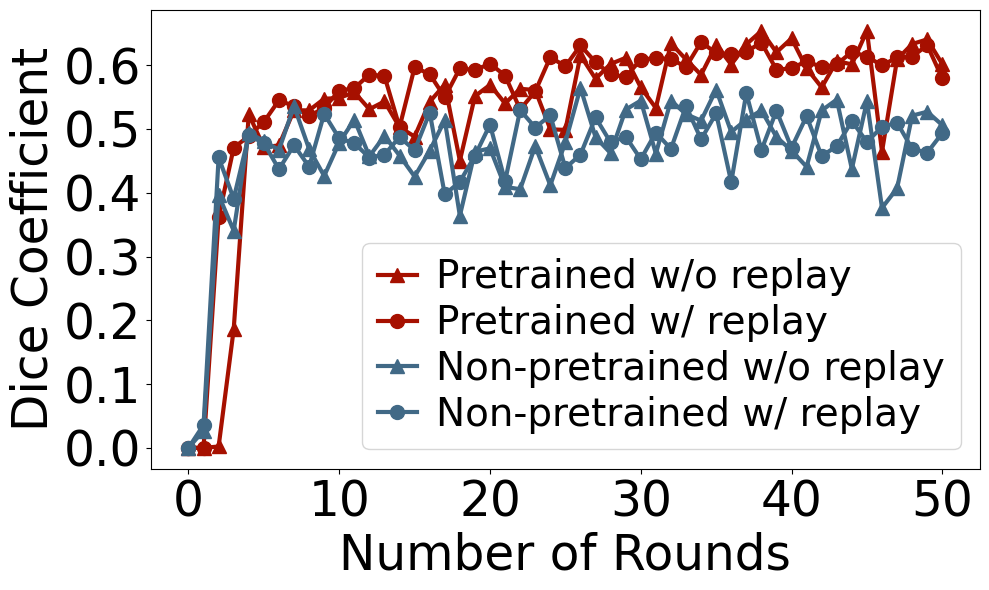

In [5]:
# plot the performance of each model
# each model has a line with different color
# continuous retraining has solid line, discrete retraining has dashed line
# replay has circle marker, no replay has triangle marker
fig = plt.figure(figsize=(10, 6))
font_size = 35
line_width = 3
marker_size = 10
# sort the model
model_continuous_replay_round_performance_list = sorted(model_continuous_replay_round_performance_list, key=lambda x: x['model_name'])
for model_performance in model_continuous_replay_round_performance_list:
    model_name = model_performance['model_name']
    continuous = model_performance['continuous']
    replay = model_performance['replay']
    pretrain = model_performance['pretrain']
    round_list = model_performance['round_list']
    performance_list = model_performance['performance_list']
    if replay:
        line_style = '-'
        marker = 'o' 
    else:
        marker = '^'
        line_style = '-'
    if model_name == 'dummy':
        color = '#416986'
        label_text = 'Non-pretrained'
    else:
        color = '#A61000'
        label_text = 'Pretrained'
    plt.plot(round_list, performance_list, label=f'{label_text} {"w/ replay" if replay else "w/o replay"}', linestyle=line_style, marker=marker, color=color, linewidth=line_width, markersize=marker_size)
    print(f'{model_name}{"_continuous" if continuous else "_init"}{"_replay" if replay else "_no_replay"}: {performance_list}')

plt.xlabel('Number of Rounds', fontsize=font_size)
plt.ylabel('Dice Coefficient', fontsize=font_size)
plt.legend(fontsize=font_size * 0.8, handlelength=1.0, handletextpad=0.5, labelspacing=0.2)
plt.xticks(fontsize=font_size)
plt.yticks(fontsize=font_size)
plt.tight_layout()
plt.savefig(os.path.join(fig_folder, f'fig2b_unet_retrain_dice.pdf'))
plt.savefig(os.path.join(fig_folder, f'fig2b_unet_retrain_dice.png'))